***
# <font color=blue size=10>Exercícios</font>
***

## Exercícios Estatística

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios mais atual que a utilizada em nossos experimentos.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.



# <font color=blue>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [30]:
dfDados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [31]:
print(dfDados.head())

   UF  Sexo  Idade  Cor  Anos de Estudo  Renda    Altura
0  11     0     23    8              12    800  1.603808
1  11     1     23    2              12   1150  1.739790
2  11     1     35    8              15    880  1.760444
3  11     0     46    2               6   3500  1.783158
4  11     1     47    8               9    150  1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [32]:
salario_minimo = 788.00
bins = [0, 2 * salario_minimo, 5 * salario_minimo, 15 * salario_minimo, 25 * salario_minimo, np.inf]

### 2º Definir os labels das classes

In [33]:
labels = ['E ► Até 2 SM', 'D ► De 2 a 5 SM', 'C ► De 5 a 15 SM', 'B ► De 15 a 25 SM', 'A ► Acima de 25 SM']
labels #Imprimindo para verificar

['E ► Até 2 SM',
 'D ► De 2 a 5 SM',
 'C ► De 5 a 15 SM',
 'B ► De 15 a 25 SM',
 'A ► Acima de 25 SM']

### 3º Construir a coluna de frequências

In [34]:
dfDados['Classe de Renda'] = pd.cut(dfDados['Renda'], bins=bins, labels=labels, include_lowest=True)
frequencia = dfDados['Classe de Renda'].value_counts(sort=False)
frequencia #Imprimindo para verificar

,count
Classe de Renda,
E ► Até 2 SM,49755
D ► De 2 a 5 SM,18602
C ► De 5 a 15 SM,7241
B ► De 15 a 25 SM,822
A ► Acima de 25 SM,420


### 4º Construir a coluna de percentuais

In [35]:

percentual = dfDados['Classe de Renda'].value_counts(normalize=True, sort=False) * 100
#Imprimindo para verificar
print(percentual.round(2))

Classe de Renda
E ► Até 2 SM          64.75
D ► De 2 a 5 SM       24.21
C ► De 5 a 15 SM       9.42
B ► De 15 a 25 SM      1.07
A ► Acima de 25 SM     0.55
Name: proportion, dtype: float64


### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [38]:
# Juntando as colunas
tabela_renda = pd.DataFrame({
    'Frequência': dfDados['Classe de Renda'].value_counts(sort=False),
    'Percentual (%)': dfDados['Classe de Renda'].value_counts(normalize=True, sort=False) * 100
})

# Formatando para duas casas decimais
tabela_renda['Percentual (%)'] = tabela_renda['Percentual (%)'].round(2)

# Ordenando conforme os labels das classes
tabela_renda = tabela_renda.loc[[
    'E ► Até 2 SM',
    'D ► De 2 a 5 SM',
    'C ► De 5 a 15 SM',
    'B ► De 15 a 25 SM',
    'A ► Acima de 25 SM'
]]

#Imprimindo para verificar
print(tabela_renda)


                    Frequência  Percentual (%)
Classe de Renda                               
E ► Até 2 SM             49755           64.75
D ► De 2 a 5 SM          18602           24.21
C ► De 5 a 15 SM          7241            9.42
B ► De 15 a 25 SM          822            1.07
A ► Acima de 25 SM         420            0.55


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<ipython-input-39-5b94b36685a9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


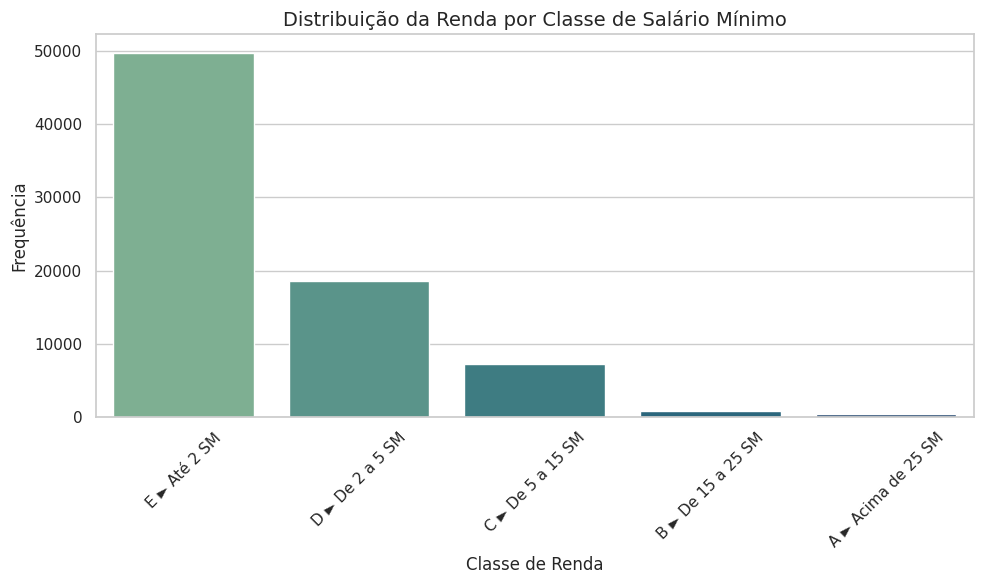

In [39]:

# Estilo visual
sns.set(style="whitegrid")

# Escolhi um gráfico de barras para demonstrar as diferenças
plt.figure(figsize=(10, 6))
sns.barplot(
    x=tabela_renda.index,
    y=tabela_renda['Frequência'],
    palette="crest"
)

plt.title('Distribuição da Renda por Classe de Salário Mínimo', fontsize=14)
plt.xlabel('Classe de Renda', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-40-686b8a1ec3c2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


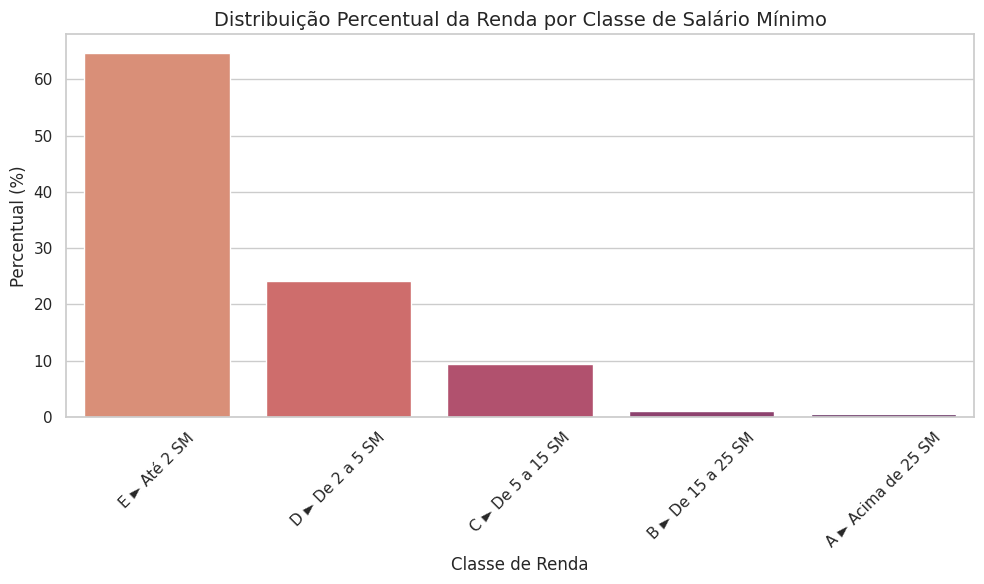

In [40]:

# Estilo visual
sns.set(style="whitegrid")

# Aqui escolhemos um gráfico de barras com percentuais
plt.figure(figsize=(10, 6))
sns.barplot(
    x=tabela_renda.index,
    y=tabela_renda['Percentual (%)'],
    palette="flare"
)

plt.title('Distribuição Percentual da Renda por Classe de Salário Mínimo', fontsize=14)
plt.xlabel('Classe de Renda', fontsize=12)
plt.ylabel('Percentual (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


> ### Conclusões

A partir dos dados analisados é possível observar que grande parte da população do país estão nas classes de renda E e D enquanto muito poucos estão na A e B. Isso indica que existe uma enorme desigualdade na distribuição de renda no Brasil. Ainda mais se considerarmos a diferença de renda da classe A (25 ou mais salários mínimos) em comparação com a grande maioria da população que está na classe E (Até 2 Salários mínimos).

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

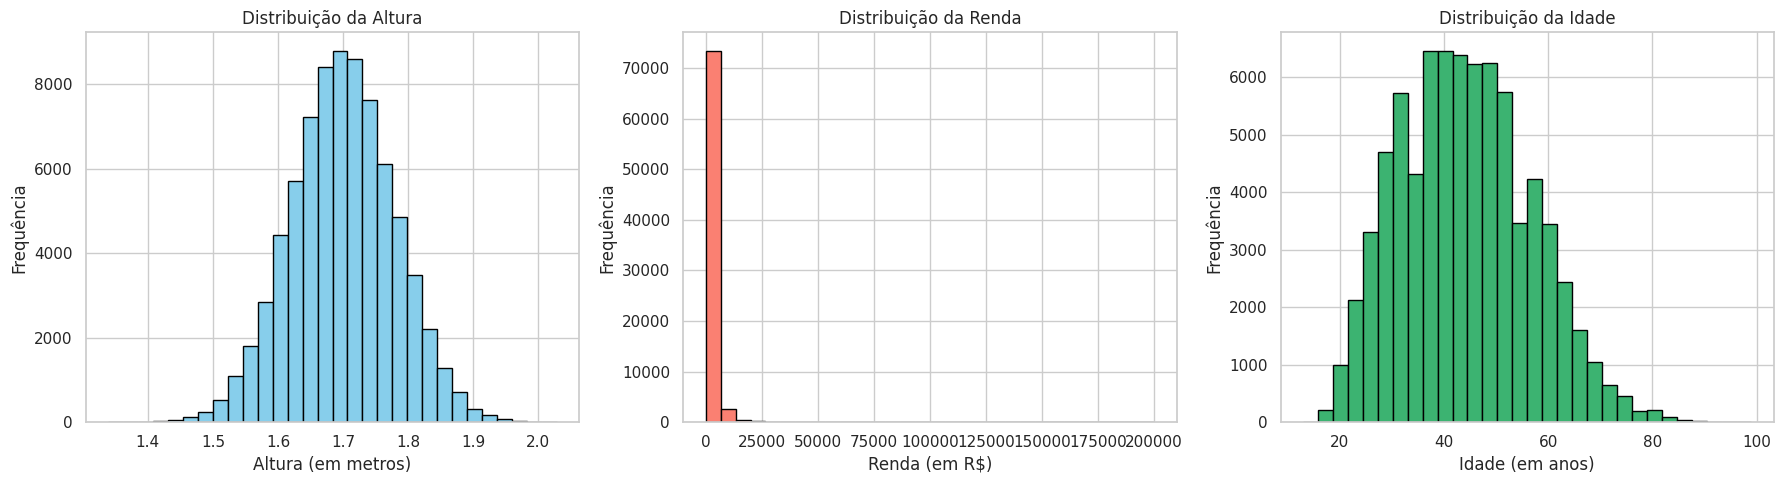

In [41]:
import matplotlib.pyplot as plt

# Configurações gerais
plt.figure(figsize=(18, 5))

# Histograma - Altura
plt.subplot(1, 3, 1)
plt.hist(dfDados['Altura'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição da Altura')
plt.xlabel('Altura (em metros)')
plt.ylabel('Frequência')

# Histograma - Renda
plt.subplot(1, 3, 2)
plt.hist(dfDados['Renda'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribuição da Renda')
plt.xlabel('Renda (em R$)')
plt.ylabel('Frequência')

# Histograma - Idade
plt.subplot(1, 3, 3)
plt.hist(dfDados['Idade'], bins=30, color='mediumseagreen', edgecolor='black')
plt.title('Distribuição da Idade')
plt.xlabel('Idade (em anos)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


> ### Conclusões

O histograma de altura apresenta distribuição simétrica, com dados concentrados entre 1,6m e 1,8m, seguindo uma distribuição normal. Já a renda mostra forte assimetria à direita, com maioria ganhando até R$2.000 e poucos alcançando valores mais altos, o que acaba por refletir a desigualdade de renda que tanto afeta o Brasil. A idade também tem assimetria à direita, com predominância de pessoas entre 20 e 60 anos (A expectativa de vida no Brasil é de cerca de 76,4 anos, o que ajuda a explicar a queda vertiginosa após os 80 anos de idade no gráfico). Cada variável revela padrões distintos, desde distribuições equilibradas até concentrações extremas.

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

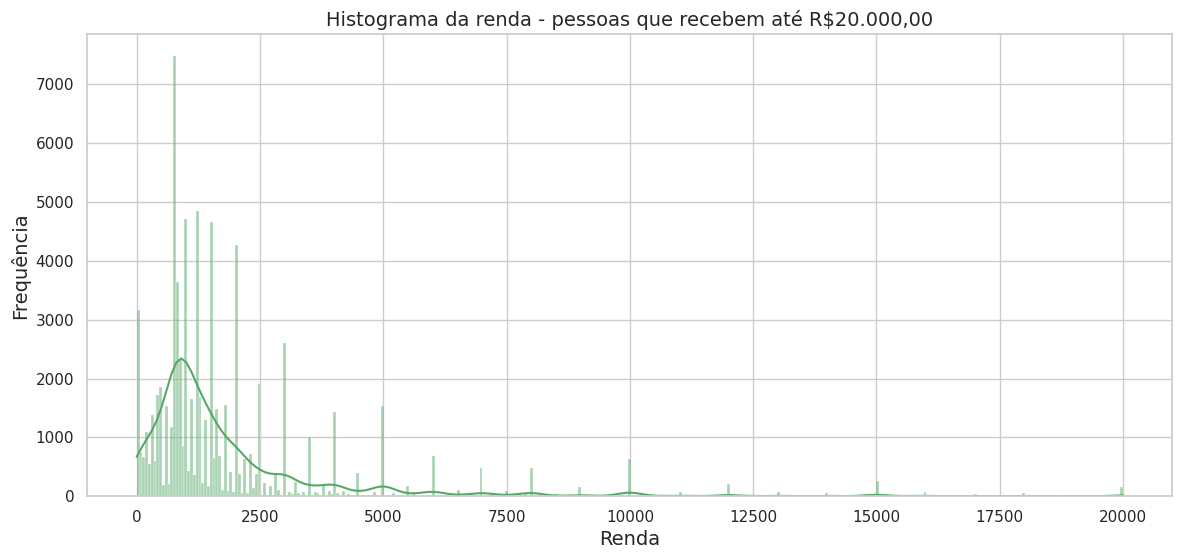

In [44]:

# Filtrando renda até 20.000
renda_20000 = dfDados.loc[dfDados['Renda'] <= 20000, 'Renda']

# Plotando
plt.figure(figsize=(14, 6))
sns.histplot(renda_20000, color='g', kde=True)

# Ajustando
plt.title('Histograma da renda - pessoas que recebem até R$20.000,00', fontsize=14)
plt.xlabel('Renda', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Imprimindo o gráfico
plt.show()


### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [46]:
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [51]:
# Gerando a tabela
tabela_s_c = pd.crosstab(index=dfDados['Cor'], columns=dfDados['Sexo'])

# Aplicando os rótulos descritivos nos índices e colunas
tabela_s_c = tabela_s_c.rename(index=cor, columns=sexo)

# Imprimindo a tabela
tabela_s_c


Sexo,Masculino,Feminino
Cor,,
Indígena,256,101
Branca,22194,9621
Preta,5502,2889
Amarela,235,117
Parda,25063,10862


In [53]:
# Gerando a tabela
tabela_s_c_percent = pd.crosstab(index=dfDados['Cor'], columns=dfDados['Sexo'], normalize=True)

# Convertendo para porcentagem e arredondando com duas casas decimais
tabela_s_c_percent = (tabela_s_c_percent * 100).round(2)

# Substituindo os códigos por rótulos legíveis
tabela_s_c_percent.rename(index=cor, columns=sexo, inplace=True)

# Imprimindo a tabela
tabela_s_c_percent


Sexo,Masculino,Feminino
Cor,,
Indígena,0.33,0.13
Branca,28.88,12.52
Preta,7.16,3.76
Amarela,0.31,0.15
Parda,32.62,14.14


> ### Conclusões

A maioria das pessoas de referência nos domicílios são homens. Entre eles, os pardos e brancos se destacam como maioria. O mesmo ocorre entre as mulheres, embora em número absoluto menor. Nesse grupo, as mulheres indígenas representam a menor proporção.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [55]:
media = dfDados['Renda'].mean()
print(f"Média: R${media:.2f}")

Média: R$2000.38


### Obtenha a mediana

In [56]:
mediana = dfDados['Renda'].median()
print(f"Mediana: R${mediana:.2f}")

Mediana: R$1200.00


### Obtenha a moda

In [57]:
moda = dfDados['Renda'].mode().iloc[0]
print(f"Moda: R${moda:.2f}")

Moda: R$788.00


### Obtenha o desvio médio absoluto

In [63]:
desvio_medio = (dfDados['Renda'] - media).abs().mean() #Calculando o MAD manualmente
print(f"Desvio médio absoluto: R${desvio_medio:.2f}")

Desvio médio absoluto: R$1526.50


### Obtenha a variância

In [60]:
variancia = dfDados['Renda'].var()
print(f"Variância amostral: {variancia:.2f}")

Variância amostral: 11044906.01


### Obtenha o desvio-padrão

In [62]:
desvio_padrao = dfDados['Renda'].std()
print(f"Desvio padrão amostral: R${desvio_padrao:.2f}")

Desvio padrão amostral: R$3323.39


### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [65]:
# Agrupando estatísticas de renda por cor e sexo
agrupamentos = {'mean', 'median', 'max'}

tabela_renda = pd.crosstab(
    dfDados['Cor'],
    dfDados['Sexo'],
    values=dfDados['Renda'],
    aggfunc=agrupamentos
)

# Arredondando os valores para duas casas decimais
tabela_renda = tabela_renda.round(2)

# Aplicando os dicionários de rótulos
tabela_renda = tabela_renda.rename(index=cor, columns=sexo)

# Imprimindo a tabela
tabela_renda


max               mean             median         
Sexo     Masculino Feminino Masculino Feminino Masculino Feminino
Cor                                                              
Indígena     10000   120000   1081.71  2464.39     797.5    788.0
Branca      200000   100000   2925.74  2109.87    1700.0   1200.0
Preta        50000    23000   1603.86  1134.60    1200.0    800.0
Amarela      50000    20000   4758.25  3027.34    2800.0   1500.0
Parda       100000    30000   1659.58  1176.76    1200.0    800.0

> ### Conclusões

A tabela mostra que pessoas brancas e amarelas têm as maiores rendas médias, especialmente os homens amarelos. Já os indígenas têm as menores rendas. Apesar de as mulheres indígenas parecerem ter uma renda média maior que pretas e pardas, a mediana mais baixa indica que poucos valores altos podem ter distorcido esse resultado.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [78]:
# Função para calcular MAD manualmente
def mad_manual(serie):
    media = serie.mean()
    return (serie - media).abs().mean()

# Estatísticas de Renda por Cor e Sexo (agregando variação, desvio e MAD manual)
# Inicialmente, calcular var e std
renda_sexo_cor2 = pd.crosstab(
    index=dfDados['Cor'],
    columns=dfDados['Sexo'],
    values=dfDados['Renda'],
    aggfunc=['var', 'std']  # Variação e Desvio Padrão
)

# Calculando o MAD manualmente para cada grupo (Cor e Sexo)
mad_values = dfDados.groupby(['Cor', 'Sexo'])['Renda'].apply(mad_manual)

# Desempacotando a série mad_values para corresponder à estrutura de colunas de renda_sexo_cor2
mad_df = mad_values.unstack()

# Adicionar um novo nível de colunas em mad_df para combinar com a estrutura MultiIndex rdsc2
mad_df.columns = pd.MultiIndex.from_product([['mad'], mad_df.columns])

# Unir os valores do mad_df com o df renda_sexo_cor2
renda_sexo_cor2 = pd.concat([renda_sexo_cor2, mad_df], axis=1)

# Arredondando tudo para duas casas decimais
renda_sexo_cor2 = renda_sexo_cor2.round(2)

# Renomeando os índices e colunas para melhor legibilidade
renda_sexo_cor2.rename(index=cor, columns=sexo, inplace=True)

# Renomeando os títulos dos níveis de coluna
renda_sexo_cor2.columns.names = ['Medida', 'Sexo']

# Imprimindo a tabela
print(renda_sexo_cor2)


Medida            var                     std                 mad         
Sexo        Masculino      Feminino Masculino  Feminino Masculino Feminino
Cor                                                                       
Indígena   1449841.13  1.429818e+08   1204.09  11957.50    798.91  3007.89
Branca    22570023.41  1.056909e+07   4750.79   3251.01   2261.01  1670.97
Preta      3749293.59  1.821960e+06   1936.31   1349.80    975.60   705.45
Amarela   32957069.62  1.392166e+07   5740.82   3731.17   3709.60  2549.15
Parda      5345747.15  2.547960e+06   2312.09   1596.23   1125.83   811.58


> ### Conclusões

Agora apresentando uma tabela com as medidas de dispersão fica visível que alguns dados estão muito dispersos na váriavel de renda pois o elevado desvio padrão nos mostra justamente isso. E como mencionado anteriormente na conclusão da tabela de medidas de tendência central, os indígenas do sexo feminino apresentam a maior dispersão entre os dados de renda.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<ipython-input-81-8797e88f1063>:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=14)


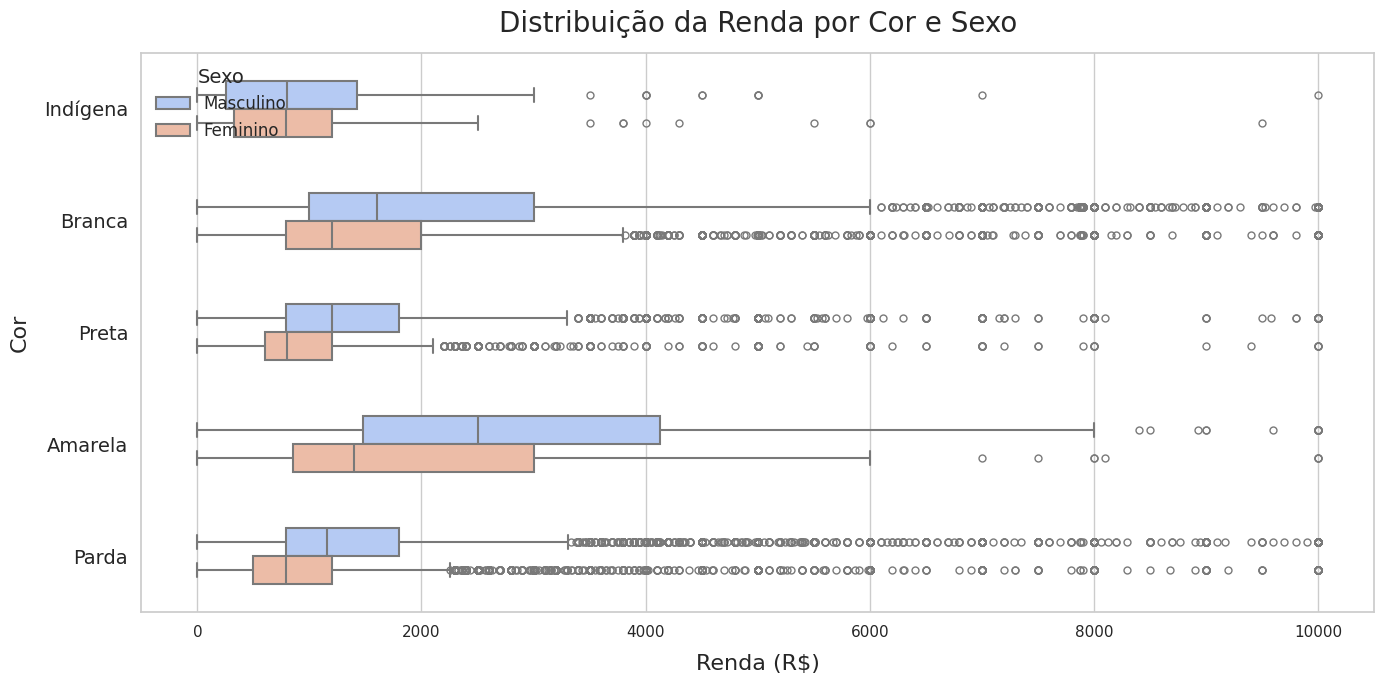

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrando os dados de acordo com a renda <= 10000
dados_filtrado = dfDados[dfDados.Renda <= 10000]

# Criando o boxplot com customizações
plt.figure(figsize=(14, 7))

# Plotando o boxplot
sns.set(style="whitegrid")
boxplot = sns.boxplot(
    data=dados_filtrado,
    x='Renda',
    y='Cor',
    orient='h',
    hue='Sexo',
    palette='coolwarm',
    linewidth=1.5,  # Espessura das linhas
    fliersize=5,  # Tamanho dos outliers
    width=0.5  # Largura do boxplot
)

# Ajustes no gráfico
boxplot.set_xlabel('Renda (R$)', fontsize=16, labelpad=10)  # Aumentando o espaço entre o título e os eixos
boxplot.set_ylabel('Cor', fontsize=16, labelpad=10)  # Ajustando o espaçamento do rótulo do eixo y
boxplot.set_title('Distribuição da Renda por Cor e Sexo', fontsize=20, pad=15)
boxplot.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda', 'Sem declaração'], fontsize=14)


handles, labels = boxplot.get_legend_handles_labels()
boxplot.legend(handles, ['Masculino', 'Feminino'], title='Sexo', title_fontsize=14, loc='upper left', fontsize=12, frameon=False)

# Ajustes finais
plt.tight_layout()  # Ajustando a disposição do gráfico
plt.show()  # Exibe o gráfico


> ### Conclusões

A partir da visualização acima é perceptível que os homens independentemente da cor apresentam uma renda maior que a das mulheres. Além disso é observado no boxplot que a cor branca e amarela apresentam uma renda maior que as demais.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [83]:

salario_minimo = 788  #Definindo o SM

# Quantidade de pessoas que ganham até um salário
pessoas_sm = dfDados[dfDados['Renda'] <= salario_minimo].shape[0]

# Contando o número total de pessoas no dataset
pessoas_total = dfDados.shape[0]

# Calculando o percentual e arredondando
percentual_pessoas_sm = (pessoas_sm / pessoas_total) * 100
percentual_pessoas_sm = round(percentual_pessoas_sm, 2)

# Imprimindo o resultado
print(f'O percentual de pessoas no nosso dataset que ganham até um salário mínimo ({salario_minimo} R$) é de {percentual_pessoas_sm}%')


O percentual de pessoas no nosso dataset que ganham até um salário mínimo (788 R$) é de 28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [86]:
valor_max_renda_99 = dfDados['Renda'].quantile(0.99)
print(f'O valor máximo de renda para 99% das pessoas no dataset é de R${valor_max_renda_99:.2f}')


O valor máximo de renda para 99% das pessoas no dataset é de R$15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [88]:
agg_funcs = ['mean', 'std', 'median', 'max'] #função de agregação
tabela_2 = pd.crosstab(index=dfDados['Anos de Estudo'], columns=dfDados['Sexo'], values=dfDados['Renda'], aggfunc=agg_funcs)
tabela_2.rename(index=anos_de_estudo, columns=sexo, inplace=True)
tabela_2


mean                       std  \
Sexo                              Masculino     Feminino    Masculino   
Anos de Estudo                                                          
Sem instrução e menos de 1 ano   799.494638   516.201748  1023.904884   
1 ano                            895.629047   492.771987  1331.950552   
2 anos                           931.178986   529.911638  1435.173827   
3 anos                          1109.203862   546.853916  2143.800133   
4 anos                          1302.329283   704.279111  1419.821787   
5 anos                          1338.653218   781.389776  1484.650587   
6 anos                          1448.875419   833.732824  1476.628602   
7 anos                          1465.497940   830.751004  1419.708673   
8 anos                          1639.396667   933.615351  1515.583715   
9 anos                          1508.038850   868.021700  2137.664774   
10 anos                         1731.270847   925.919225  2078.609734   
11 anos                         2117.060504  1286.790889  2676.538942   
12 anos                         2470.330776  1682.313725  2268.081538   
13 anos                         3195.099154  1911.730047  2797.116800   
14 anos                         3706.620269  2226.460457  3987.214974   
15 anos ou mais                 6134.279790  3899.513231  7447.613594   
Não determinados                1295.761905   798.174419   979.648745   

                                               median                max  \
Sexo                               Feminino Masculino Feminino Masculino   
Anos de Estudo                                                             
Sem instrução e menos de 1 ano   639.311534     700.0    390.0     30000   
1 ano                            425.291842     788.0    400.0     30000   
2 anos                           498.234168     788.0    450.0     40000   
3 anos                           424.124446     800.0    500.0     80000   
4 anos                           629.553397    1000.0    788.0     50000   
5 anos                           635.782641    1045.0    788.0     35000   
6 anos                           574.547028    1200.0    788.0     25000   
7 anos                           602.038029    1200.0    788.0     40000   
8 anos                           896.781213    1300.0    800.0     30000   
9 anos                           973.221652    1200.0    788.0     60000   
10 anos                          620.611907    1218.0    800.0     45000   
11 anos                         1819.040417    1500.0   1000.0    200000   
12 anos                         4851.833513    1800.0   1200.0     30000   
13 anos                         2053.789771    2400.0   1300.0     25000   
14 anos                         2064.083336    2500.0   1600.0     50000   
15 anos ou mais                 4212.770709    4000.0   2800.0    200000   
Não determinados                 459.985964    1200.0    788.0      7000   

                                         
Sexo                           Feminino  
Anos de Estudo                           
Sem instrução e menos de 1 ano    10000  
1 ano                              2000  
2 anos                             4000  
3 anos                             3500  
4 anos                            10000  
5 anos                             8000  
6 anos                             6000  
7 anos                             9000  
8 anos                            18000  
9 anos                            20000  
10 anos                            6000  
11 anos                          100000  
12 anos                          120000  
13 anos                           20000  
14 anos                           20000  
15 anos ou mais                  100000  
Não determinados                   3000

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<ipython-input-90-3ce47bac38f6>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  boxplot2.set_yticklabels(labels=anos_estudo_labels, fontsize=14)


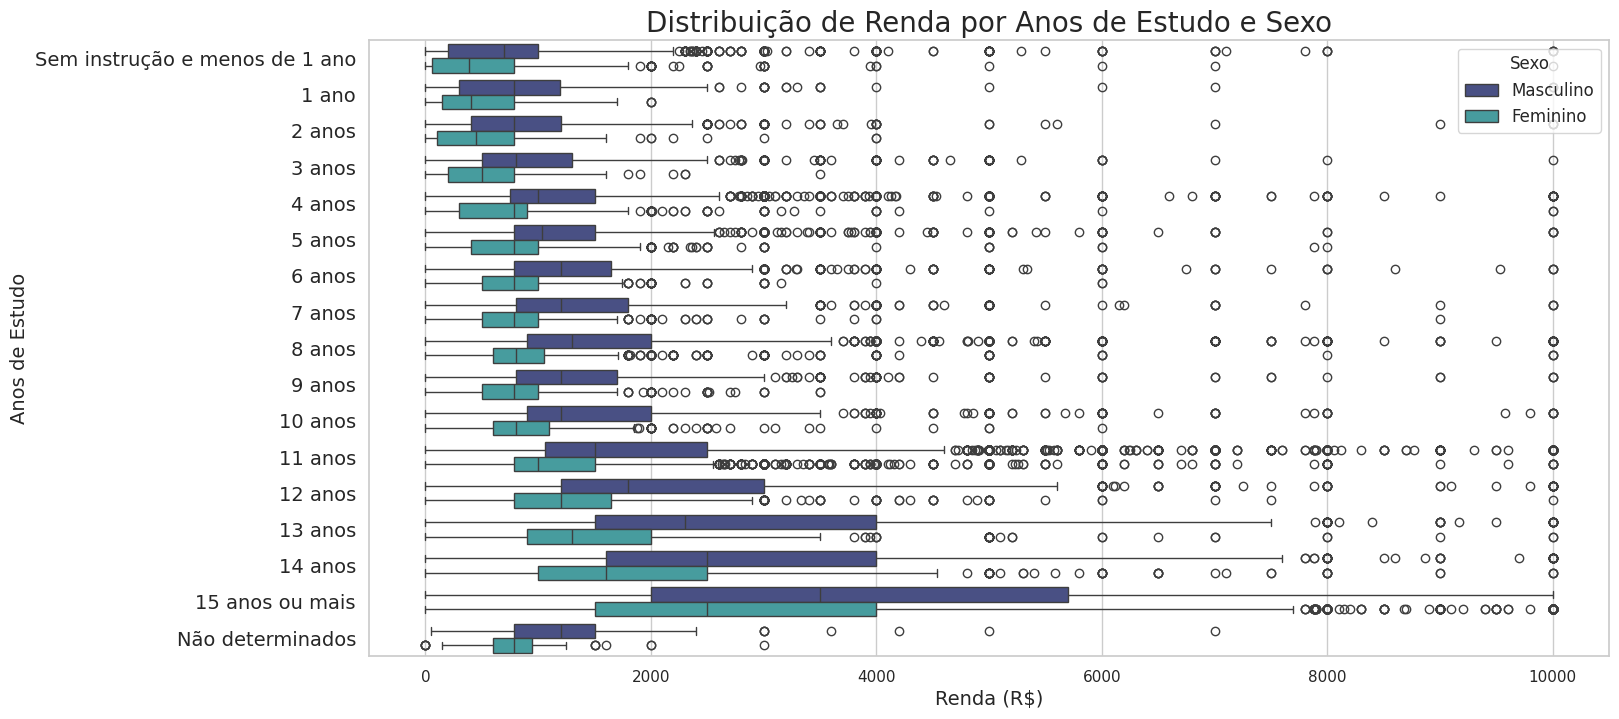

In [90]:

anos_estudo_labels = list(anos_de_estudo.values())

# Construção do boxplot para a distribuição de Renda por Anos de Estudo e Sexo
boxplot2 = sns.boxplot(
    data=dados_filtrado,
    x='Renda',
    y='Anos de Estudo',
    orient='h',
    palette='mako',
    hue='Sexo'
)


boxplot2.figure.set_size_inches(16, 8)

# Definindo o título e os rótulos dos eixos
boxplot2.set_title('Distribuição de Renda por Anos de Estudo e Sexo', fontsize=20)
boxplot2.set_xlabel('Renda (R$)', fontsize=14)
boxplot2.set_ylabel('Anos de Estudo', fontsize=14)

# Ajustando os rótulos do eixo y para representar os valores de Anos de Estudo
boxplot2.set_yticklabels(labels=anos_estudo_labels, fontsize=14)

# Modificando a legenda para exibir os gêneros corretamente
handles, _ = boxplot2.get_legend_handles_labels()
boxplot2.legend(handles, ['Masculino', 'Feminino'], title='Sexo', fontsize=12)


> ### Conclusões

O boxplot acima evidencia a desigualdade de renda entre homens e mulheres. Mesmo com maior escolaridade, as mulheres ainda apresentam rendimentos inferiores aos dos homens.



### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [92]:
# Agrupando os dados por UF e calculando as estatísticas desejadas pela coluna 'Renda'
tabela_3 = dfDados.groupby('UF').agg({
    'Renda': ['mean', 'median', 'max', 'std']
})

# Renomeando os índices e colunas
tabela_3.rename(
    index=uf,
    columns={
        'mean': 'Média',
        'median': 'Mediana',
        'max': 'Máximo',
        'std': 'Desvio Padrão'
    },
    inplace=True
)

# Imprimindo a tabela
tabela_3


Renda                              
                           Média Mediana  Máximo Desvio Padrão
UF                                                            
Rondônia             1789.761223  1200.0   50000   2406.161161
Acre                 1506.091782   900.0   30000   2276.233415
Amazonas             1445.130100   900.0   22000   1757.935591
Roraima              1783.588889  1000.0   20000   2079.659238
Pará                 1399.076871   850.0   50000   2053.779555
Amapá                1861.353516  1200.0   15580   2020.688632
Tocantins            1771.094946  1000.0   60000   2934.590741
Maranhão             1019.432009   700.0   30000   1887.816905
Piauí                1074.550784   750.0   40000   2373.355726
Ceará                1255.403692   789.0   25000   1821.963536
Rio Grande do Norte  1344.721480   800.0   15500   1651.805500
Paraíba              1293.370487   788.0   30000   1950.272431
Pernambuco           1527.079319   900.0   50000   2389.622497
Alagoas              1144.552602   788.0   11000   1237.856197
Sergipe              1109.111111   788.0   16000   1478.997878
Bahia                1429.645094   800.0  200000   3507.917248
Minas Gerais         2056.432084  1200.0  100000   3584.721547
Espírito Santo       2026.383852  1274.0  100000   3513.846868
Rio de Janeiro       2496.403168  1400.0  200000   5214.583518
São Paulo            2638.104986  1600.0   80000   3503.777366
Paraná               2493.870753  1500.0  200000   4302.937995
Santa Catarina       2470.854945  1800.0   80000   3137.651112
Rio Grande do Sul    2315.158336  1500.0   35000   2913.335783
Mato Grosso do Sul   2262.604167  1500.0   42000   3031.419122
Mato Grosso          2130.652778  1500.0   35000   2542.630178
Goiás                1994.580794  1500.0   30000   2221.933065
Distrito Federal     4241.954722  2000.0  100000   5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<ipython-input-93-826d7a2b6788>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  boxplot4 = sns.boxplot(


TypeError: unsupported format string passed to builtin_function_or_method.__format__

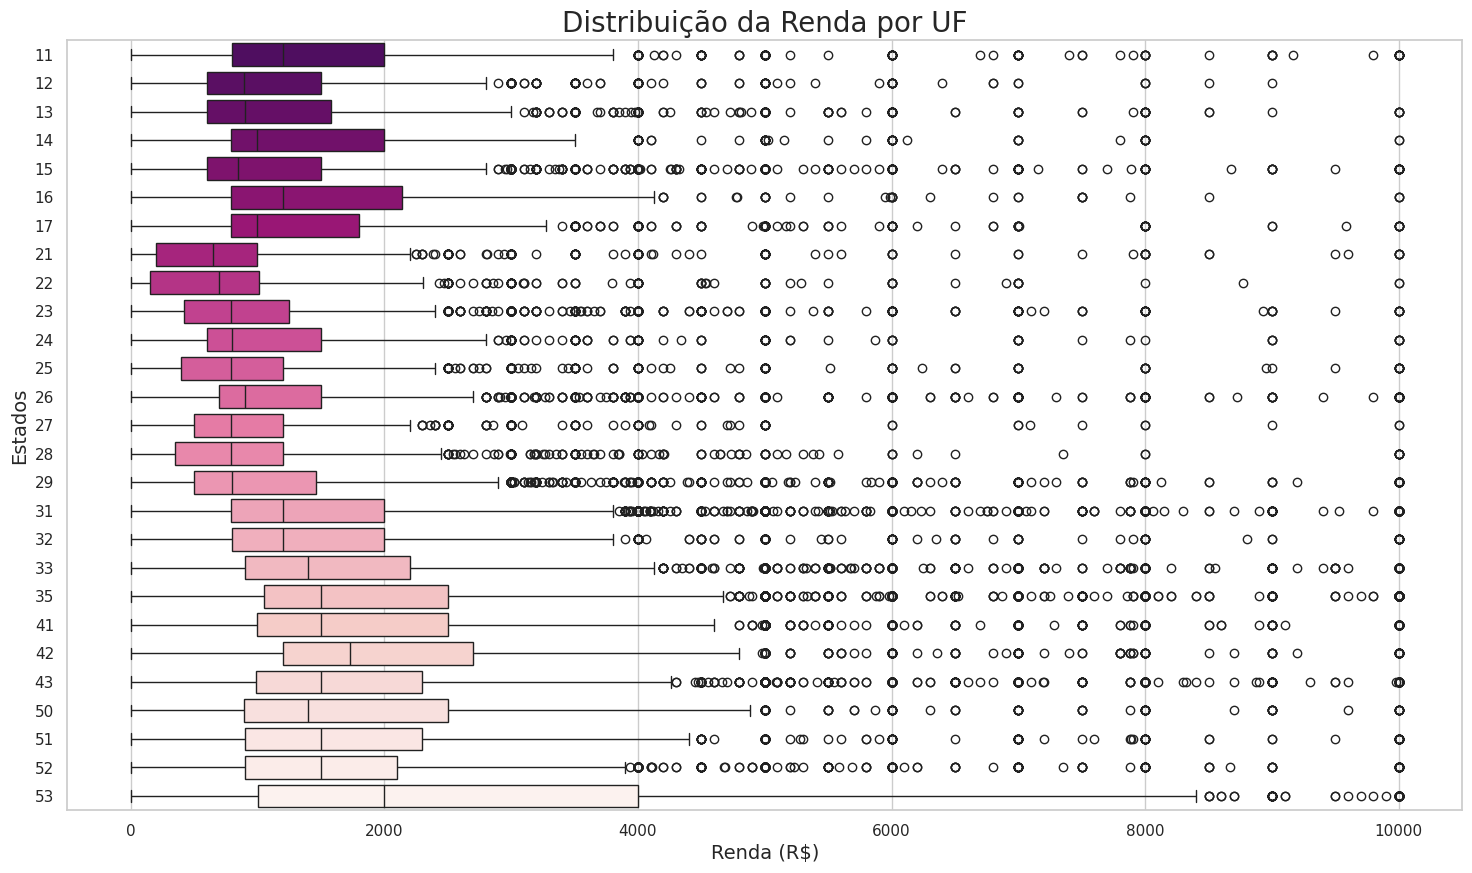

In [93]:
# Extraindo os valores de UF
uf_list = uf.values

# Construindo o boxplot com a renda por Unidades de Federação
boxplot4 = sns.boxplot(
    data=dados_filtrado,
    x='Renda',
    y='UF',
    orient='h',
    palette='RdPu_r'
)


boxplot4.figure.set_size_inches(18, 10)

# Configurando os rótulos e o título do gráfico
boxplot4.set_xlabel('Renda (R$)', fontsize=14)
boxplot4.set_ylabel('Estados', fontsize=14)
boxplot4.set_title('Distribuição da Renda por UF', fontsize=20)

# Definindo os rótulos no eixo Y
boxplot4.set_yticklabels(labels=uf_list, fontsize=12)


> ### Conclusões

A partir do boxplot de renda por unidade de federação, é visível que algumas unidades apresentam uma renda maior que as demais como por exemplo o Distrito Federal. Assim como as unidades da região sudeste apresentam uma uma renda maior que as da região nordeste e norte. Possivelmente isso é um reflexo da diferença de níveis de desenvolvimento de cada região, seja em infraestrutura de saúde ou até mesmo diferentes níveis de economia e riqueza entre cada região. Além da diferença entre o custo de vida de cada região.



## Finalizando.

Resolva 3 exercícios de sua escolha do Capítulo 1 do livro **OpenIntro Statistics**

##Exercício 1.9: As Íris de Fisher
Contexto:
Sir Ronald Aylmer Fisher, estatístico e biólogo inglês, trabalhou com um conjunto de dados que continha medidas de comprimento e largura da sépala e comprimento e largura da pétala de três espécies de íris (setosa, versicolor e virginica). Havia 50 flores de cada espécie no conjunto de dados.

Perguntas:
(a) Quantos casos (observações) há no total?
(b) Quantas variáveis numéricas estão incluídas? Liste-as e indique se são contínuas ou discretas.
(c) Quantas variáveis categóricas estão incluídas? Quais são? Liste suas categorias.

##Respostas:
(a) 50 × 3 = 150 casos.

(b) 4 variáveis numéricas contínuas:
Comprimento da sépala;
Largura da sépala;
Comprimento da pétala;
Largura da pétala.

(c) 1 variável categórica:

Espécie (com 3 níveis): setosa, versicolor, virginica.

##Exercício 1.11: Aeroportos dos EUA
Contexto:
Uma visualização mostra a distribuição geográfica de aeroportos nos EUA continentais e em Washington, DC. Cada observação no conjunto de dados representa um aeroporto.

Perguntas:
(a) Liste as variáveis usadas na visualização.
(b) Classifique cada variável como numérica (contínua/discreta) ou categórica (ordinal/nominal).

##Respostas:
(a) Variáveis utilizadas:
Tipo de propriedade do aeroporto (público/privado);
Status de uso do aeroporto (público/privado);
Latitude;
Longitude.

(b) Classificação:
Propriedade do aeroporto: categórica nominal;
Status de uso: categórica nominal;
Latitude: numérica contínua;
Longitude: numérica contínua.

##Exercício 1.17: Relaxamento após o trabalho
Contexto:
A pesquisa General Social Survey perguntou a uma amostra aleatória de 1.155 americanos:
"Após um dia médio de trabalho, quantas horas você tem para relaxar ou fazer atividades que gosta?"
A média de horas de relaxamento foi 1,65 horas.

Perguntas:
Classifique os itens abaixo como:

Observação

Variável

Estatística amostral

Parâmetro populacional

(a) Um americano na amostra.
(b) Número de horas gastas relaxando após o trabalho.
(c) O valor 1,65.
(d) A média de horas que todos os americanos gastam relaxando.

##Respostas:
(a) Observação (unidade individual da amostra);
(b) Variável (o que está sendo medido);
(c) Estatística amostral (média calculada da amostra);
(d) Parâmetro populacional (média hipotética da população).